In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import chi2_contingency
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

## Importing Dataset

In [5]:
df = pd.read_csv('/Users/deogirekartik/Vscode/Technical Seminar/datset/healthcare-dataset-stroke-data.csv')

In [6]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

## DATA PREPROCESSING

## Dealing with Null Values 

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#Dropping the null values
df.dropna(inplace = True)
df.shape
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.drop(['id'], axis = 1, inplace = True)

## Outlier Detection

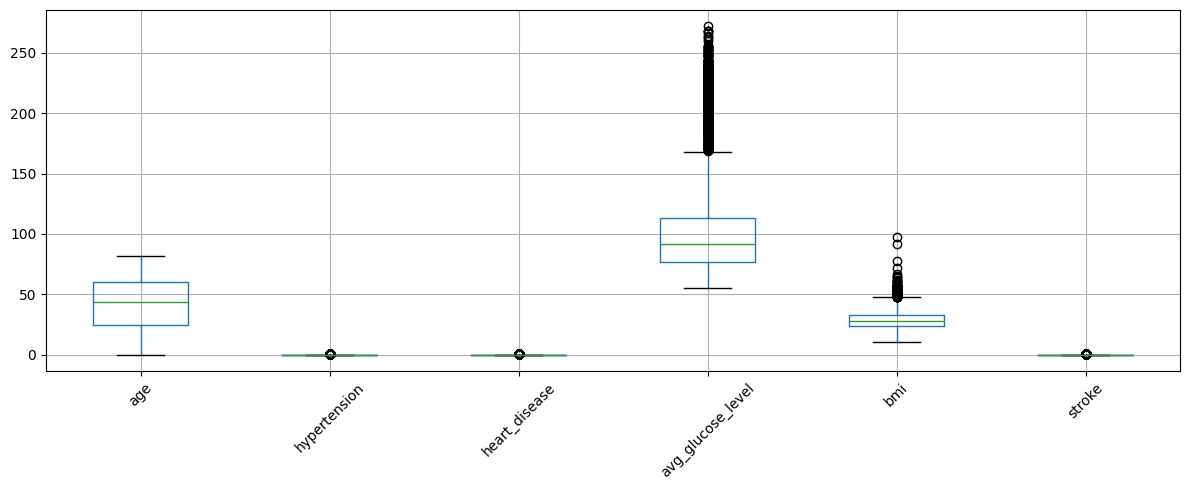

In [12]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [13]:
min = df['age'].min()
max = df['age'].max()
print(min)
print(max)

0.08
82.0


## Average Glucose level.

Min: 55.12 
Max: 271.74
Q1: 77.07 
Q3: 113.57 
IQR: 36.5 
Lower Bound: 49.69499999999999 
Upper Bound: 140.945


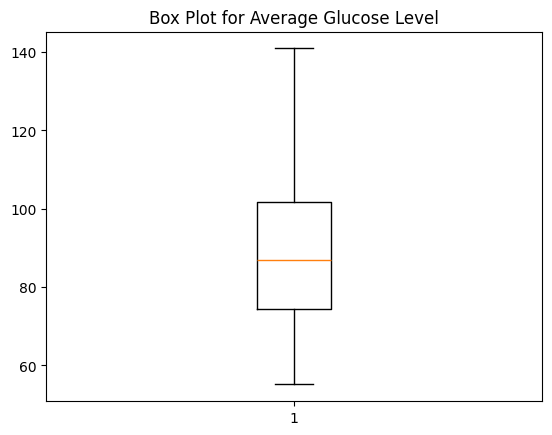

In [14]:
min = df['avg_glucose_level'].min()
max = df['avg_glucose_level'].max()
print("Min:",min,"\nMax:",max)

# First Quartile
Q1 = df['avg_glucose_level'].quantile(0.25)

# Third Quartile
Q3 = df['avg_glucose_level'].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_bound = Q1 - (0.75 * IQR)
upper_bound = Q3 + (0.75 * IQR)

print("Q1:",Q1,"\nQ3:",Q3,"\nIQR:",IQR,"\nLower Bound:",lower_bound,"\nUpper Bound:",upper_bound)

# Drop the outliers
df =df[(df['avg_glucose_level'] >= lower_bound) & (df['avg_glucose_level'] <= upper_bound)]
plt.boxplot(df['avg_glucose_level']) 
plt.title('Box Plot for Average Glucose Level')
plt.show()

## BMI

Min: 10.3 
Max: 97.6
Q1: 23.1 
Q3: 32.4 
IQR: 9.299999999999997 
Lower Bound: 16.125000000000004 
Upper Bound: 39.375


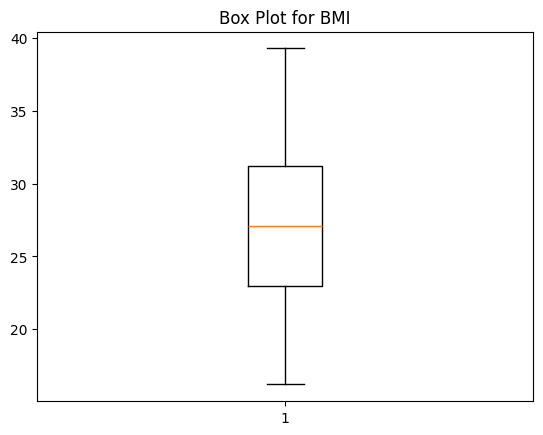

In [15]:
min = df['bmi'].min()
max = df['bmi'].max()
print("Min:",min,"\nMax:",max)

# First Quartile
Q1 = df['bmi'].quantile(0.25)

# Third Quartile
Q3 = df['bmi'].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_bound = Q1 - (0.75 * IQR)
upper_bound = Q3 + (0.75 * IQR)

print("Q1:",Q1,"\nQ3:",Q3,"\nIQR:",IQR,"\nLower Bound:",lower_bound,"\nUpper Bound:",upper_bound)

# Drop the outliers
df =df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]
plt.boxplot(df['bmi']) 
plt.title('Box Plot for BMI')
plt.show()

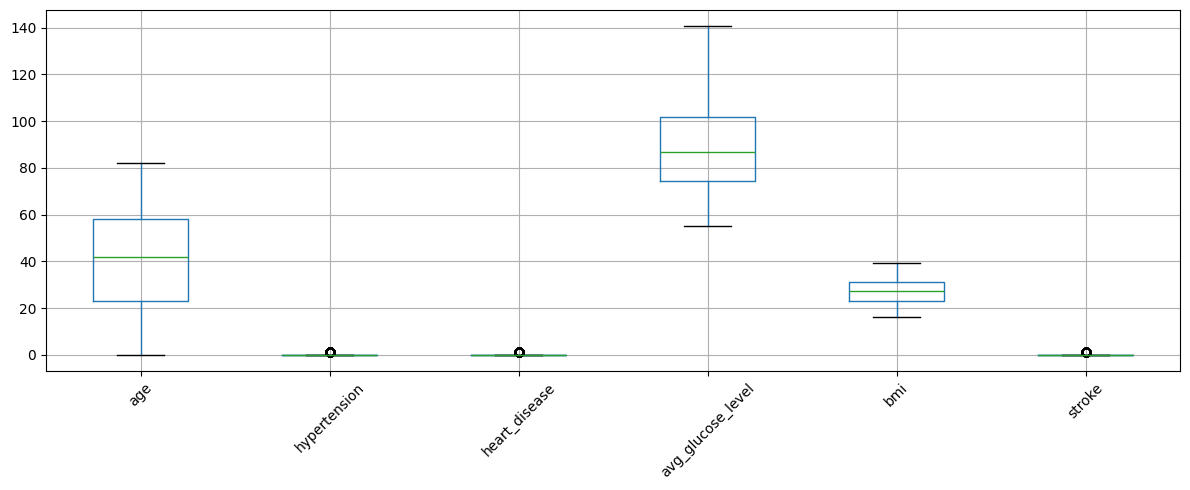

In [16]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Dealing with Duplicates

In [17]:
df.duplicated().sum()

0

In [18]:
df['stroke'] = df['stroke'].astype('category')

In [19]:
print(f"Number of rows after removing outliers: {df.shape[0]}")

Number of rows after removing outliers: 3741


<Axes: >

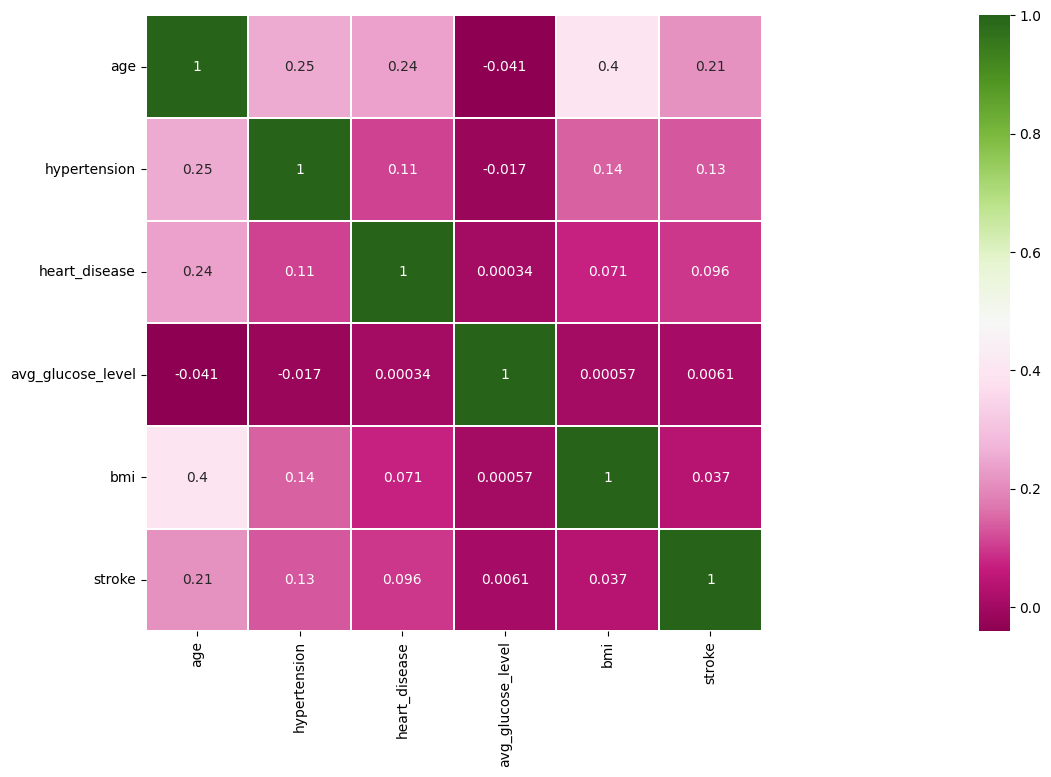

In [20]:
numerical_cols = [cols for cols in df.columns if df.dtypes[cols] != 'O']
plt.figure(figsize=(56, 8))
corr = df.loc[:,numerical_cols].corr(method="pearson")
sns.heatmap(corr, cmap='PiYG', square=True, linewidths=.2, annot = True)
# plt.tight_layout()

From the aboce correlation matrix we can say that the numerical columns are not highly correlated

## Normalization and standardization

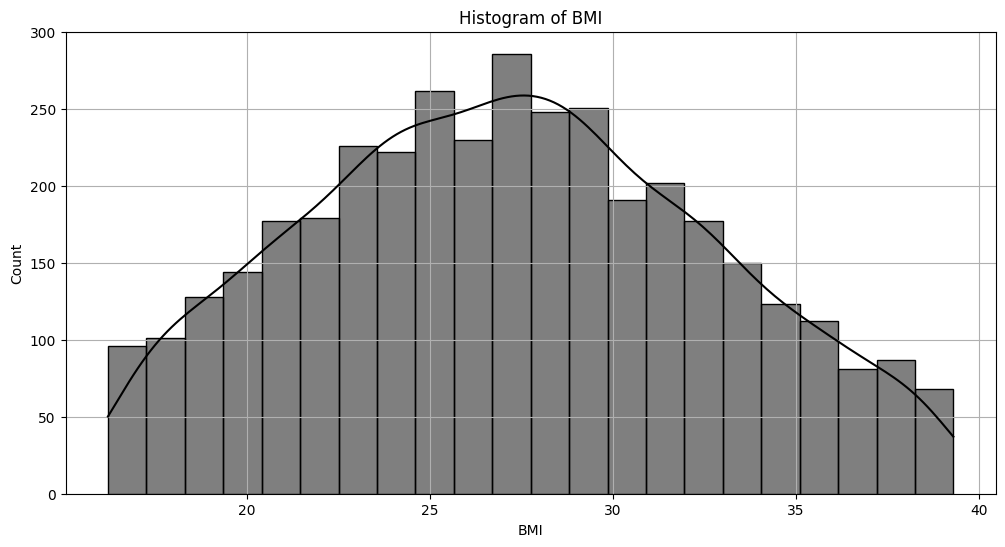

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="bmi", kde=True, color='black')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Histogram of BMI")
plt.grid(True)
plt.show()

It is well balanced

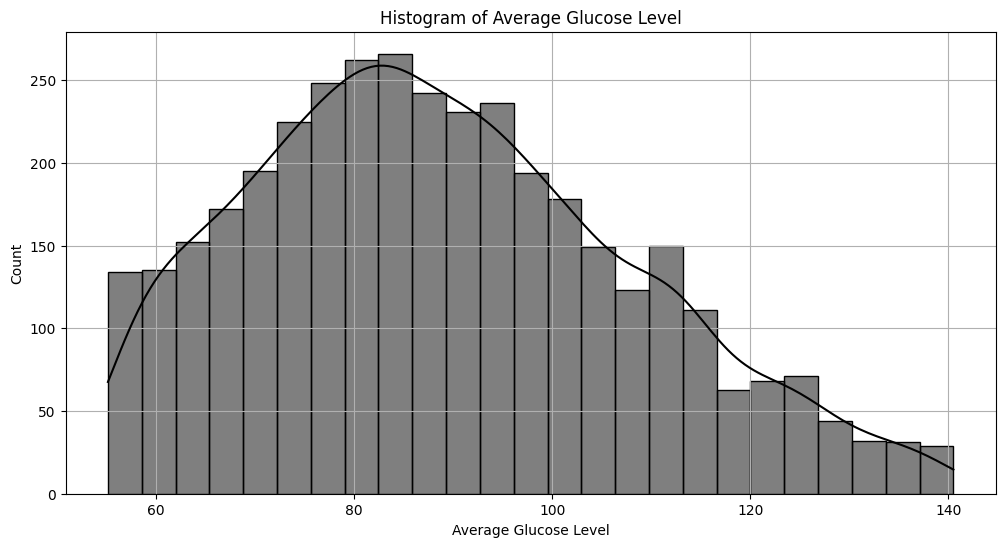

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="avg_glucose_level", kde=True, color='black')
plt.xlabel("Average Glucose Level")
plt.ylabel("Count")
plt.title("Histogram of Average Glucose Level")
plt.grid(True)
plt.show()

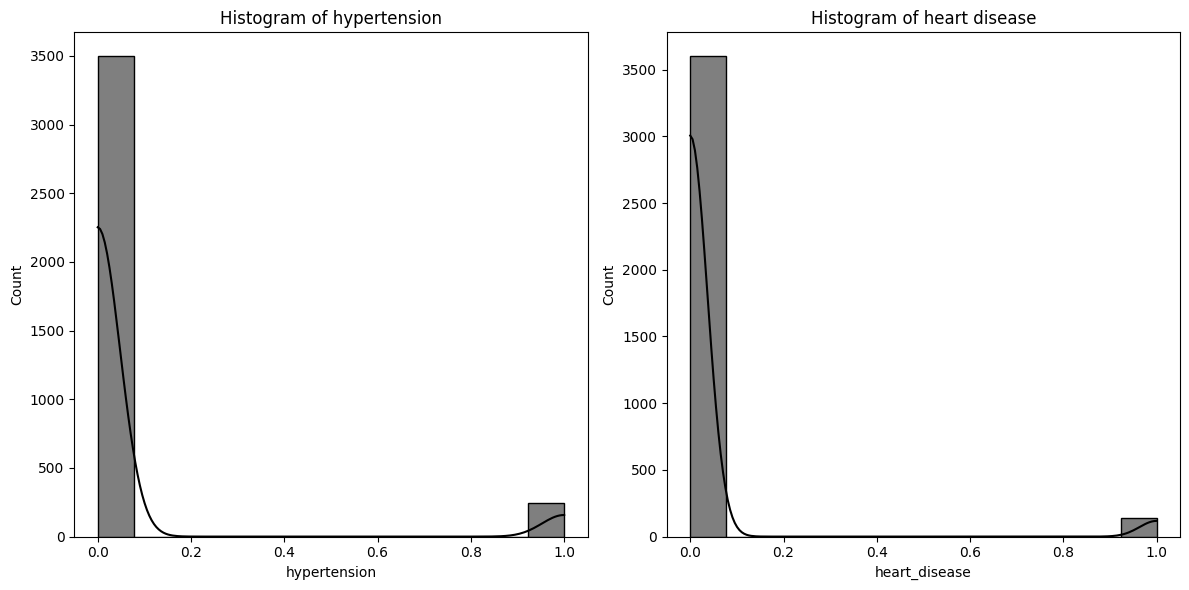

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df, ax=axes[0], x="hypertension", kde=True, color='black')
axes[0].set_title('Histogram of hypertension')

sns.histplot(df, ax=axes[1], x="heart_disease", kde=True, color='black')
axes[1].set_title('Histogram of heart disease')

plt.tight_layout()
plt.show()

(array([3616.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         125.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

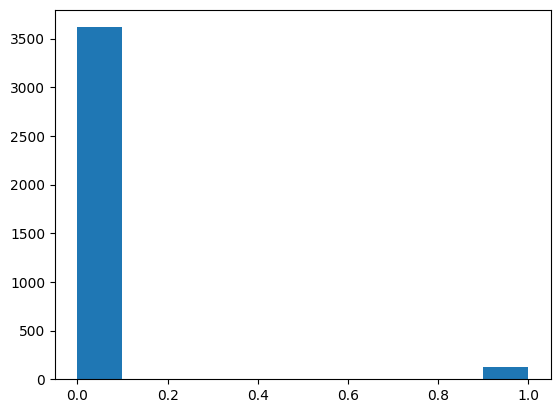

In [24]:
plt.hist(df['stroke'])



In [48]:
import pandas as pd

# Assuming 'data' is your dataset with a column named 'binary_column'
# Replace 'data.csv' with the actual path to your dataset file
#data = pd.read_csv('data.csv')
stroke_column = df['stroke']

# Count occurrences of 1's and 0's
count_ones = (stroke_column == 1).sum()
count_zeros = (stroke_column == 0).sum()

print("Number of 1's:", count_ones)
print("Number of 0's:", count_zeros)


Number of 1's: 125
Number of 0's: 3616


(array([3600.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         141.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

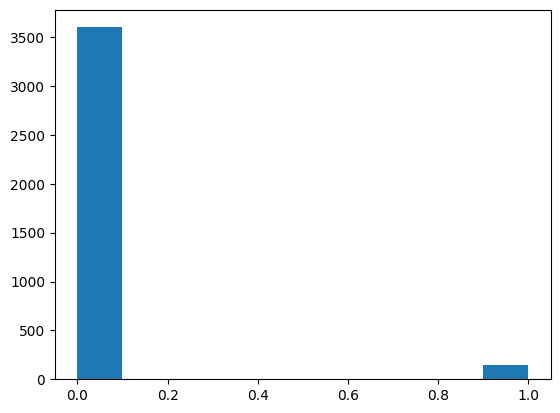

In [25]:
plt.hist(df['heart_disease'])

In [26]:
scaler = StandardScaler().set_output(transform='pandas')
df_num = df[numerical_cols].copy()
df_num = scaler.fit_transform(df_num)

In [27]:
categorical_cols = [cols for cols in df.columns if df.dtypes[cols] == 'O']
print(categorical_cols)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [28]:
# Encoding categorical columns
df_cat = pd.get_dummies(df[categorical_cols], drop_first=True)

In [29]:
X = pd.concat([df_num, df_cat], axis=1)
Y = df[['stroke']].copy()

In [30]:
over = SMOTE(sampling_strategy = 1)
X_smote, Y_smote = over.fit_resample(X, Y)

In [31]:
Y_smote.value_counts()


stroke
0         3616
1         3616
Name: count, dtype: int64

In [32]:
total_observations_after_smote = len(Y_smote)
print(total_observations_after_smote)

7232


In [33]:
print(X_smote.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [34]:
total_observations = df.shape[0]
print("Total number of observations:", total_observations)

Total number of observations: 3741


## Re checking

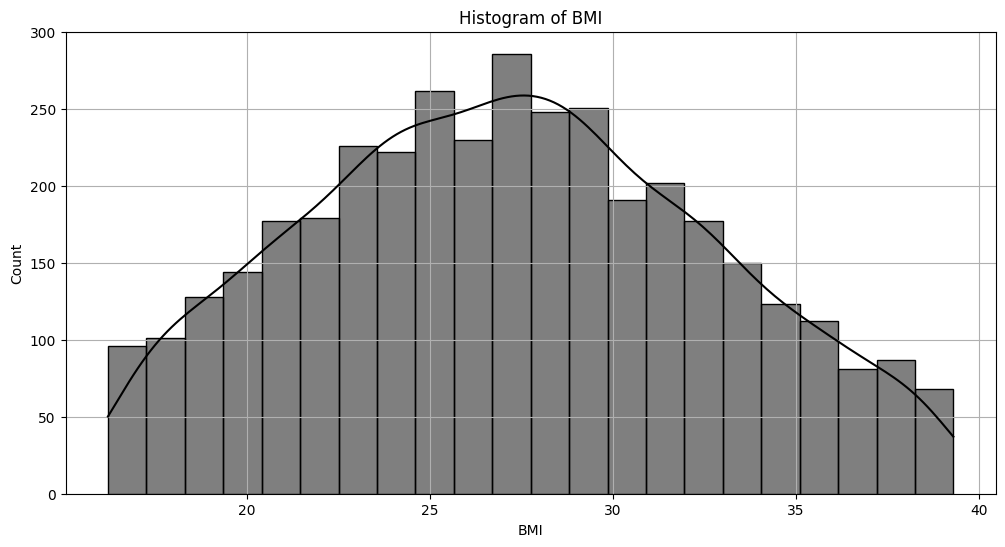

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="bmi", kde=True, color='black')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Histogram of BMI")
plt.grid(True)
plt.show()

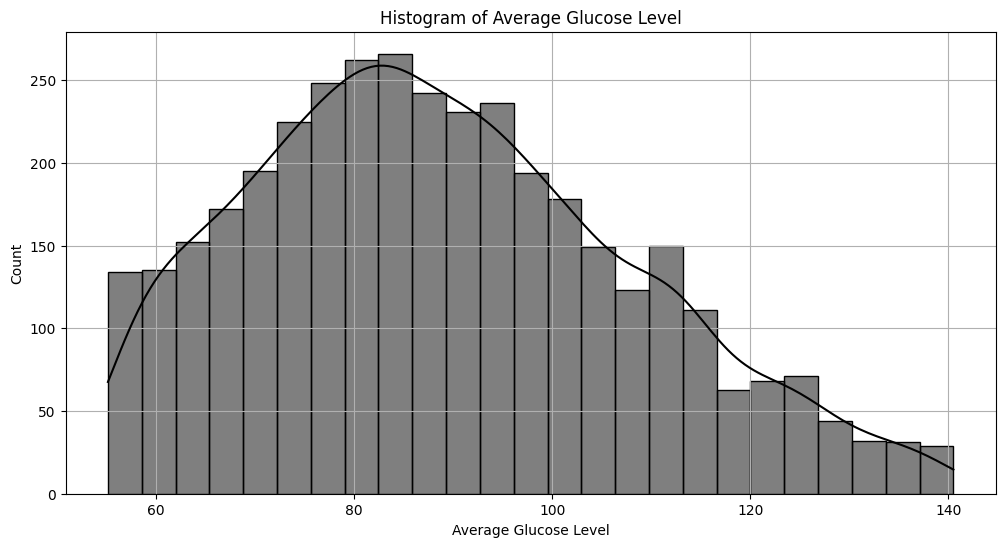

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="avg_glucose_level", kde=True, color='black')
plt.xlabel("Average Glucose Level")
plt.ylabel("Count")
plt.title("Histogram of Average Glucose Level")
plt.grid(True)
plt.show()

In [37]:
skewness = skew(df['avg_glucose_level'])

if skewness > 0:
    print("The data is right-skewed.")
elif skewness < 0:
    print("The data is left-skewed.")
else:
    print("The data is approximately symmetric.")

print("Skewness value:", skewness)

The data is right-skewed.
Skewness value: 0.40121377756211396


In [38]:
transformed_data = np.sqrt(df['avg_glucose_level'])

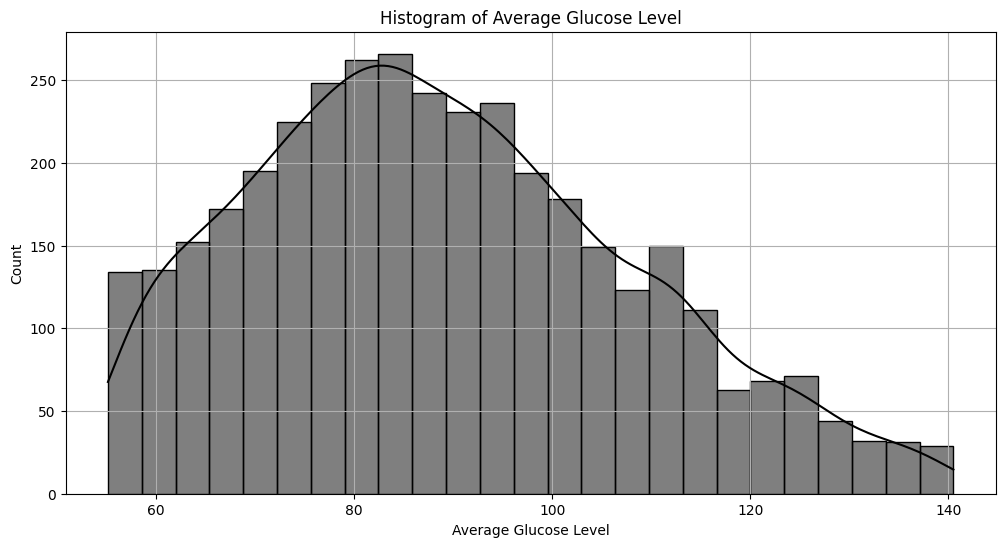

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="avg_glucose_level", kde=True, color='black')
plt.xlabel("Average Glucose Level")
plt.ylabel("Count")
plt.title("Histogram of Average Glucose Level")
plt.grid(True)
plt.show()

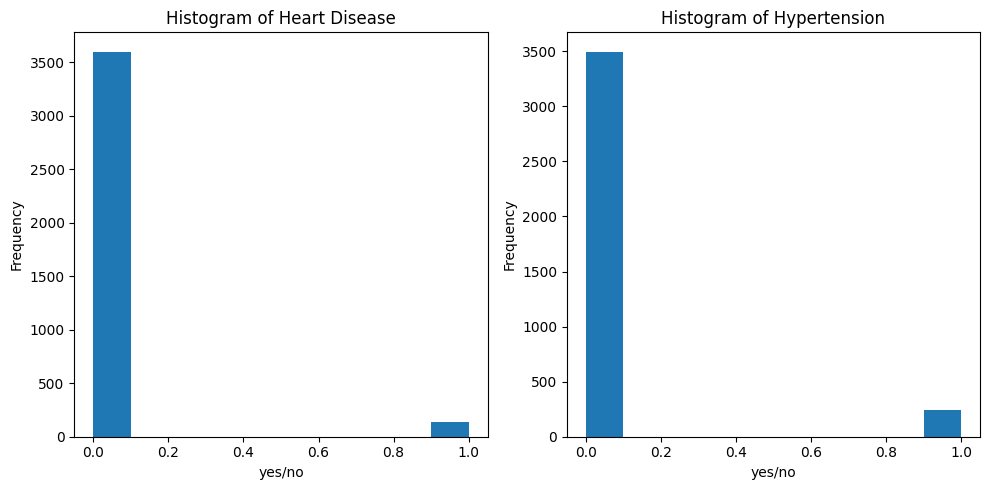

In [40]:
# Assuming df is your DataFrame containing the columns you want to plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for the first column
axs[0].hist(df['heart_disease'])
axs[0].set_title('Histogram of Heart Disease')
axs[0].set_xlabel('yes/no')
axs[0].set_ylabel('Frequency')

# Plot histogram for the second column
axs[1].hist(df['hypertension'])
axs[1].set_title('Histogram of Hypertension')
axs[1].set_xlabel('yes/no')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

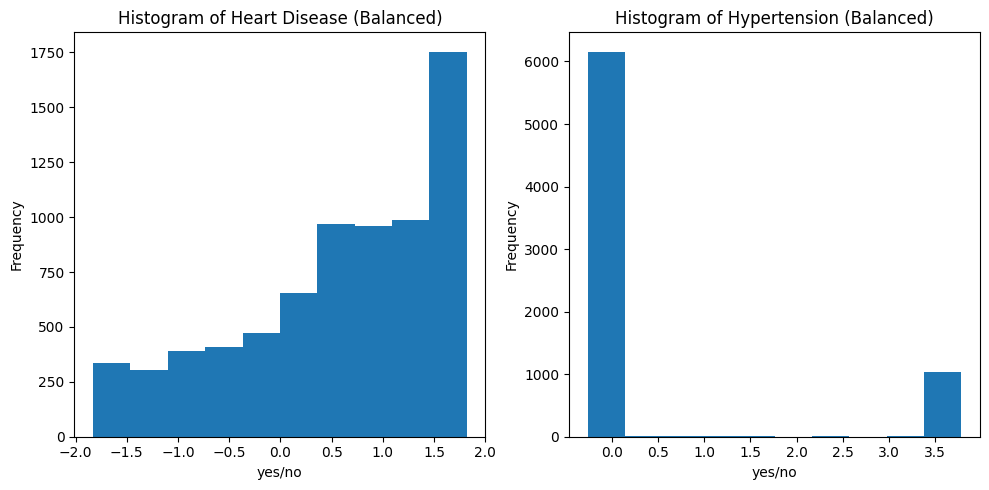

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_smote is your balanced feature matrix and y_smote is the synthetic target variable after applying SMOTE

# Concatenate X_smote and y_smote to create a DataFrame for plotting
balanced_df = pd.concat([X_smote, Y_smote], axis=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for the first column (assuming heart_disease is the first column)
axs[0].hist(balanced_df.iloc[:, 0])
axs[0].set_title('Histogram of Heart Disease (Balanced)')
axs[0].set_xlabel('yes/no')
axs[0].set_ylabel('Frequency')

# Plot histogram for the second column (assuming hypertension is the second column)
axs[1].hist(balanced_df.iloc[:, 1])
axs[1].set_title('Histogram of Hypertension (Balanced)')
axs[1].set_xlabel('yes/no')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [42]:
# Assuming y_smote is your target variable after applying SMOTE
# If y_smote is a DataFrame
feature_data = X_smote['heart_disease']

# If y_smote is a Series
feature_data = X_smote

# Display the data
print(feature_data)
# x=df['heart_disease']
# print(x)


           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     1.729552     -0.264148       5.052912           0.888822  0.966990   
1     1.462356      3.785758       5.052912          -0.981308  0.043731   
2     1.239692     -0.264148      -0.197906           0.287019 -0.789012   
3     1.640487     -0.264148      -0.197906          -1.582590 -0.535569   
4     1.774085      3.785758      -0.197906          -0.441617  0.460103   
...        ...           ...            ...                ...       ...   
7227  0.902447      3.785758      -0.197906          -0.693320  0.017442   
7228  0.259589     -0.264148      -0.197906           0.629758  0.678732   
7229  1.654877      3.785758      -0.197906           1.075710 -0.460625   
7230  1.785161      2.264431       5.052912          -0.593107 -0.445614   
7231  1.521953      3.785758      -0.197906          -0.917606 -0.953892   

        stroke  gender_Male  ever_married_Yes  work_type_Never_worked  \
0     5.378476

In [43]:
print(Y_smote.head()) 


  stroke
0      1
1      1
2      1
3      1
4      1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state=42)

In [45]:
def get_test_scores(model_name:str, preds, y_test_data, auc):
    table = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'AUC'])
    table.loc[0] = {
        'Model': model_name,
        'Precision': precision_score(y_test_data, preds),
        'Recall': recall_score(y_test_data, preds),
        'F1 Score': f1_score(y_test_data, preds),
        'Accuracy': accuracy_score(y_test_data, preds),
        'AUC': auc
    }
    return table

In [46]:
test_scores = []
target_names = ['No stroke', 'Stroke']
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True),
          GaussianNB(),
          RandomForestClassifier()
          ]
model_name_list = []
model_metrics = {}

for mdl in models:
    model = mdl.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    report  = classification_report(y_test, y_pred, target_names=target_names)

    # Calculate ROC and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    test_score = get_test_scores(model_name, y_pred, y_test, auc )

    model_metrics[model_name] = [model, y_pred, report, fpr, tpr, auc, test_score]

NameError: name 'LogisticRegression' is not defined

In [ ]:
for key, value in model_metrics.items():
  print(f"Report for {key} model:")
  print(value[2])

Report for LogisticRegression model:
              precision    recall  f1-score   support

   No stroke       1.00      1.00      1.00       899
      Stroke       1.00      1.00      1.00       909

    accuracy                           1.00      1808
   macro avg       1.00      1.00      1.00      1808
weighted avg       1.00      1.00      1.00      1808

Report for DecisionTreeClassifier model:
              precision    recall  f1-score   support

   No stroke       1.00      1.00      1.00       899
      Stroke       1.00      1.00      1.00       909

    accuracy                           1.00      1808
   macro avg       1.00      1.00      1.00      1808
weighted avg       1.00      1.00      1.00      1808

Report for SVC model:
              precision    recall  f1-score   support

   No stroke       1.00      1.00      1.00       899
      Stroke       1.00      1.00      1.00       909

    accuracy                           1.00      1808
   macro avg       1.00     